    Jacob Knopping
    1/1/2020
    
## 16.4 Data Cleaning III: Outliers

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

    1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
    2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
    3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
    4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
    5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
    6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [1]:
#Check libraries are installed
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
#Check dataframe:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
print(education_df.columns)
print(len(education_df.columns))

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')
25


In [5]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [6]:
#Check for missing values
education_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

__1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?__

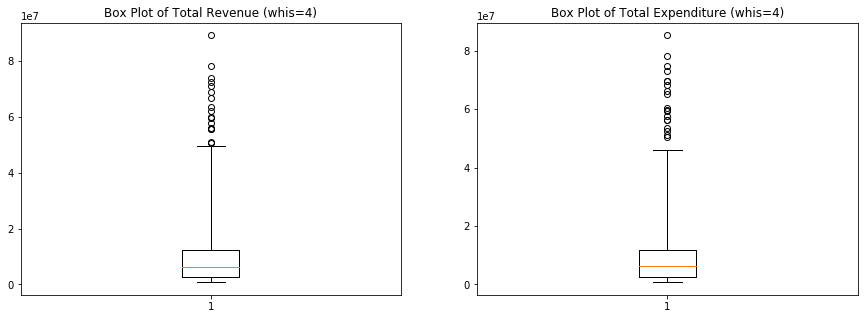

In [7]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df['TOTAL_REVENUE'], whis=4)
plt.title("Box Plot of Total Revenue (whis=4)")

plt.subplot(1,2,2)
plt.boxplot(education_df['TOTAL_EXPENDITURE'], whis=4)
plt.title("Box Plot of Total Expenditure (whis=4)")
plt.show()

In [8]:
from scipy.stats import zscore

z_scores_1 = zscore(education_df['TOTAL_REVENUE'])
z_scores_2 = zscore(education_df['TOTAL_EXPENDITURE'])

#Using thresholds of 2 and 3
for threshold in range(2,4):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores_1 > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores_1 > threshold)[0]))))
    
for threshold in range(2,4):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores_2 > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores_2 > threshold)[0]))))

The score threshold is: 2
The indices of the outliers:
(array([ 27,  62,  91, 114, 142, 165, 193, 204, 216, 246, 257, 269, 297,
       308, 322, 350, 361, 373, 401, 412, 425, 453, 458], dtype=int64),)
Number of outliers is: 23
The score threshold is: 3
The indices of the outliers:
(array([ 62, 114, 165, 216, 246, 269, 297, 322, 350, 373, 401, 412, 425,
       453, 458], dtype=int64),)
Number of outliers is: 15
The score threshold is: 2
The indices of the outliers:
(array([ 27,  62,  91, 114, 142, 153, 165, 193, 204, 216, 246, 257, 269,
       297, 308, 322, 350, 361, 373, 401, 412, 425, 453, 458], dtype=int64),)
Number of outliers is: 24
The score threshold is: 3
The indices of the outliers:
(array([ 62, 114, 165, 216, 246, 257, 269, 297, 308, 322, 350, 373, 401,
       412, 425, 453, 458], dtype=int64),)
Number of outliers is: 17


Yes, both these variables have outliers. 

__2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.__

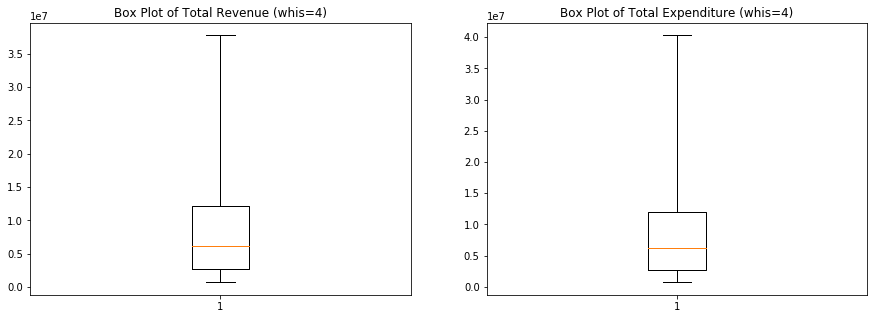

In [9]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(education_df['TOTAL_REVENUE'], (0, 0.05))
winsorized_expenditure = winsorize(education_df['TOTAL_EXPENDITURE'], (0, 0.05))


plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis=4)
plt.title("Box Plot of Total Revenue (whis=4)")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis=4)
plt.title("Box Plot of Total Expenditure (whis=4)")
plt.show()

Using winsorization, all the outliers were elimanted.

__3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.__

In [10]:
budget_deficit = education_df['TOTAL_REVENUE'] - education_df['TOTAL_EXPENDITURE']
budget_deficit.head()

209   -207170.0
211   -248251.0
212   -113997.0
213   -278711.0
214   -183962.0
dtype: float64

Text(0.5, 1.0, 'Box plot of budget deficit')

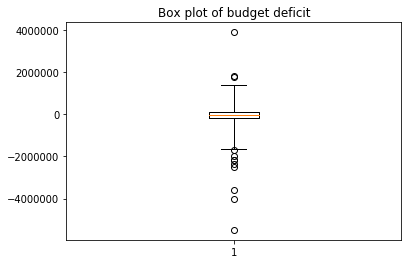

In [11]:
plt.boxplot(budget_deficit, whis = 5)
plt.title("Box plot of budget deficit")

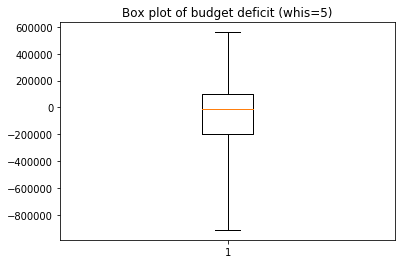

In [12]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))
plt.boxplot(winsorized_budget, whis=5)
plt.title('Box plot of budget deficit (whis=5)')
plt.show()

Again, using winsorization, outliers were eliminated.

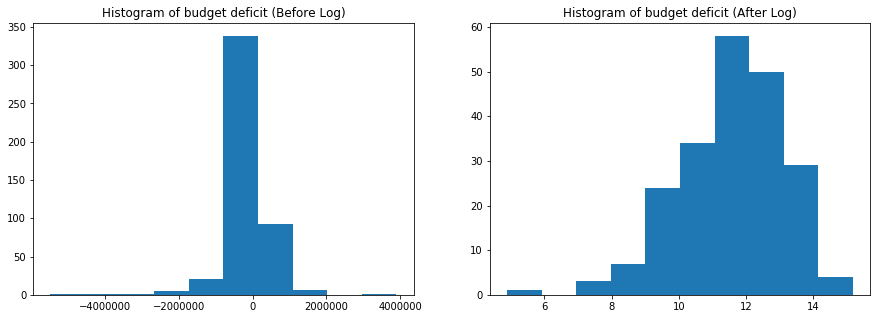

In [13]:
log_budget = np.log(budget_deficit)

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(budget_deficit)
plt.title('Histogram of budget deficit (Before Log)')

plt.subplot(1,2,2)
plt.hist(log_budget)
plt.title('Histogram of budget deficit (After Log)')
plt.show()

A log transformation (above) as a potential alternative to create a more normal distribution.

__4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.__

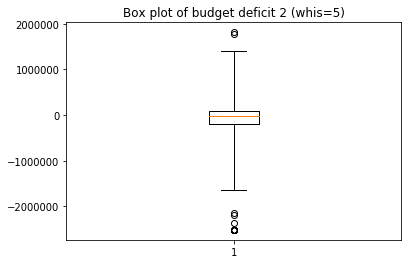

In [14]:
budget_deficit_2 = winsorized_revenue - winsorized_expenditure

plt.boxplot(budget_deficit_2, whis = 5)
plt.title("Box plot of budget deficit 2 (whis=5)")
plt.show()

There are again outliers. They can be winsorized:

Text(0.5, 1.0, 'Box plot of budget deficit 2 (whis=5)')

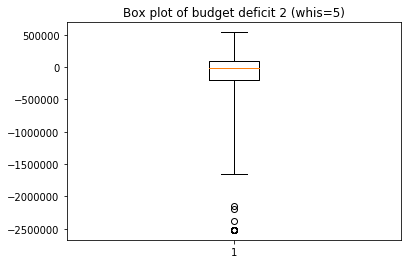

In [15]:
winsorized_budget_2 = winsorize(budget_deficit_2, (0.05, 0.05))

plt.boxplot(winsorized_budget_2, whis=5)
plt.title('Box plot of budget deficit 2 (whis=5)')

Many of the outliers are eliminated, however, a few remain.

Text(0.5, 1.0, 'Box plot of budget deficit 2 (whis=5)')

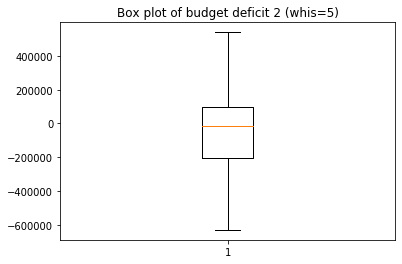

In [16]:
windsorized_budget_2 = winsorize(budget_deficit_2, (0.1, 0.05))

plt.boxplot(windsorized_budget_2, whis=5)
plt.title('Box plot of budget deficit 2 (whis=5)')

Chaning the lower bound of winsorization to 10% (from 5%) got rid of the remaining lower bound outliers.

__5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?__

In [17]:
pd.DataFrame({'Original Budget': budget_deficit, 'Winsorized Budget 1': winsorized_budget, 'Winsorized Budget 2': winsorized_budget_2}).describe()

,Original Budget,Winsorized Budget 1,Winsorized Budget 2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.094882e+04,-58733.012876,-1.720532e+05
std,6.144222e+05,341300.816505,6.509561e+05
min,-5.487742e+06,-913765.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-8.872500e+03,-8872.500000,-1.282350e+04
75%,1.013948e+05,101394.750000,9.826300e+04
max,3.897129e+06,560511.000000,5.400550e+05


There are substantial differences in almost all descriptive statistics. Outlier elimination strategy has a critical impact on summary statistics!

__6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?__

The approach in the third question is more appropriate, as the data is only processed, or winsorized, once. Creating a variable and then appling outer elimination techniques is more logical.